### Import required libraries

In [3]:
import numpy as np
import pandas as pd
import requests
import json
import math
from PIL import Image
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

### Load JSON file for annotated PPE images

In [4]:
with open('PPE_images_view.json') as fp:
        data = json.load(fp)

In [6]:
# full json dump
data

{'_via_settings': {'ui': {'annotation_editor_height': 25,
   'annotation_editor_fontsize': 0.8,
   'leftsidebar_width': 18,
   'image_grid': {'img_height': 80,
    'rshape_fill': 'none',
    'rshape_fill_opacity': 0.3,
    'rshape_stroke': 'yellow',
    'rshape_stroke_width': 2,
    'show_region_shape': True,
    'show_image_policy': 'all'},
   'image': {'region_label': '__via_region_id__',
    'region_color': '__via_default_region_color__',
    'region_label_font': '10px Sans',
    'on_image_annotation_editor_placement': 'NEAR_REGION'}},
  'core': {'buffer_size': 18, 'filepath': {}, 'default_filepath': ''},
  'project': {'name': 'PPE_Images'}},
 '_via_img_metadata': {'0b59d3bd16.jpg12385': {'filename': '0b59d3bd16.jpg',
   'size': 12385,
   'regions': [{'shape_attributes': {'name': 'rect',
      'x': 107,
      'y': 20,
      'width': 67,
      'height': 33},
     'region_attributes': {'class': 'hardhat'}},
    {'shape_attributes': {'name': 'rect',
      'x': 109,
      'y': 87,
     

In [38]:
#view one image's json structure

print(json.dumps(data['_via_img_metadata']["af1a82aa26.jpg6662"], indent=2))

{
  "filename": "af1a82aa26.jpg",
  "size": 6662,
  "regions": [
    {
      "shape_attributes": {
        "name": "rect",
        "x": 122,
        "y": 10,
        "width": 75,
        "height": 46
      },
      "region_attributes": {
        "class": "hardhat"
      }
    },
    {
      "shape_attributes": {
        "name": "rect",
        "x": 100,
        "y": 112,
        "width": 113,
        "height": 69
      },
      "region_attributes": {
        "class": "vest"
      }
    }
  ],
  "file_attributes": {}
}


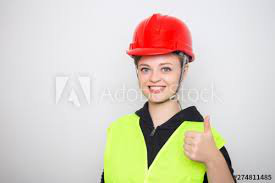

In [21]:
# let's view the corresponding image for above json value '0b59d3bd16.jpg'

Image.open("ppe_images/af1a82aa26.jpg")

In [22]:
#function to get x,y,h,w values for bbox from images

def get_bbox(img_annot):
    bboxes = []
    for bbox in img_annot["regions"]:
        shape_attrs = bbox["shape_attributes"]
        x = shape_attrs["x"]
        y = shape_attrs["y"]
        width = shape_attrs["width"]
        height = shape_attrs["height"]

        bboxes.append((x, y, width, height))

    return bboxes

In [ ]:
def get_bboxratio(img_annot):
    ratios = []
    img_width, img_height = Image.open(os.path.join(BASE_DIR, "images", img_annot["filename"])).size
    for bbox in get_bbox(img_annot):
        x, y, width, height = bbox
        ratios.append([width/img_width, height/img_height])
    return ratios

In [37]:
bbratio = []

for img_annot in data.values():
    print(img_annot)
    #bbratio.extend(get_bboxratio(img_annot))
    


{'ui': {'annotation_editor_height': 25, 'annotation_editor_fontsize': 0.8, 'leftsidebar_width': 18, 'image_grid': {'img_height': 80, 'rshape_fill': 'none', 'rshape_fill_opacity': 0.3, 'rshape_stroke': 'yellow', 'rshape_stroke_width': 2, 'show_region_shape': True, 'show_image_policy': 'all'}, 'image': {'region_label': '__via_region_id__', 'region_color': '__via_default_region_color__', 'region_label_font': '10px Sans', 'on_image_annotation_editor_placement': 'NEAR_REGION'}}, 'core': {'buffer_size': 18, 'filepath': {}, 'default_filepath': ''}, 'project': {'name': 'PPE_Images'}}
{'0b59d3bd16.jpg12385': {'filename': '0b59d3bd16.jpg', 'size': 12385, 'regions': [{'shape_attributes': {'name': 'rect', 'x': 107, 'y': 20, 'width': 67, 'height': 33}, 'region_attributes': {'class': 'hardhat'}}, {'shape_attributes': {'name': 'rect', 'x': 109, 'y': 87, 'width': 71, 'height': 75}, 'region_attributes': {'class': 'vest'}}], 'file_attributes': {}}, '1ca8a4bb9a.jpg10053': {'filename': '1ca8a4bb9a.jpg', '

In [ ]:
def get_bboxratio(img_annot):
    ratios = []
    img_width, img_height = Image.open(os.path.join(BASE_DIR, "images", img_annot["filename"])).size
    for bbox in get_bbox(img_annot):
        x, y, width, height = bbox
        ratios.append([width/img_width, height/img_height])
    return ratios

In [ ]:
img_width, img_height = Image.open(os.path.join(BASE_DIR, "images", img_annot["filename"])).size

In [ ]:
for j in range(len(data['_via_img_metadata'][i]['regions'])):
 